## EDA Diabetes Pirma Indiana

An EDA will be conducted on this dataset,so that we can be able to see any trends and correlations within our Data. This will aid us in forming our Hypothesis and subsequently train our Machine Learning models accordingly.

**About Our Data set**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Columns**

- Pregnancies:   Number of times pregnant
- Glucose:       Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin:       2-Hour serum insulin (mu U/ml)
- BMi:           Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction:   Diabetes pedigree function
- Age :          Age (years)
- Outcome:       Class variable (0 or 1) 0 for non diabetic and 1 for Diabetic

### Brief Overview of our Dataset

In [2]:
#Importing the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
 


In [3]:
#Reading our file into a pandas dataframe.
#This will make Analysis easier

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Getting Arithmetic information from our data set

df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Getting information of the data type of our columns and its contents

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Our Dataset has 768 entries with 9 columns

df.shape 

(768, 9)

In [7]:
#Finding if we have null values in our Dataset

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

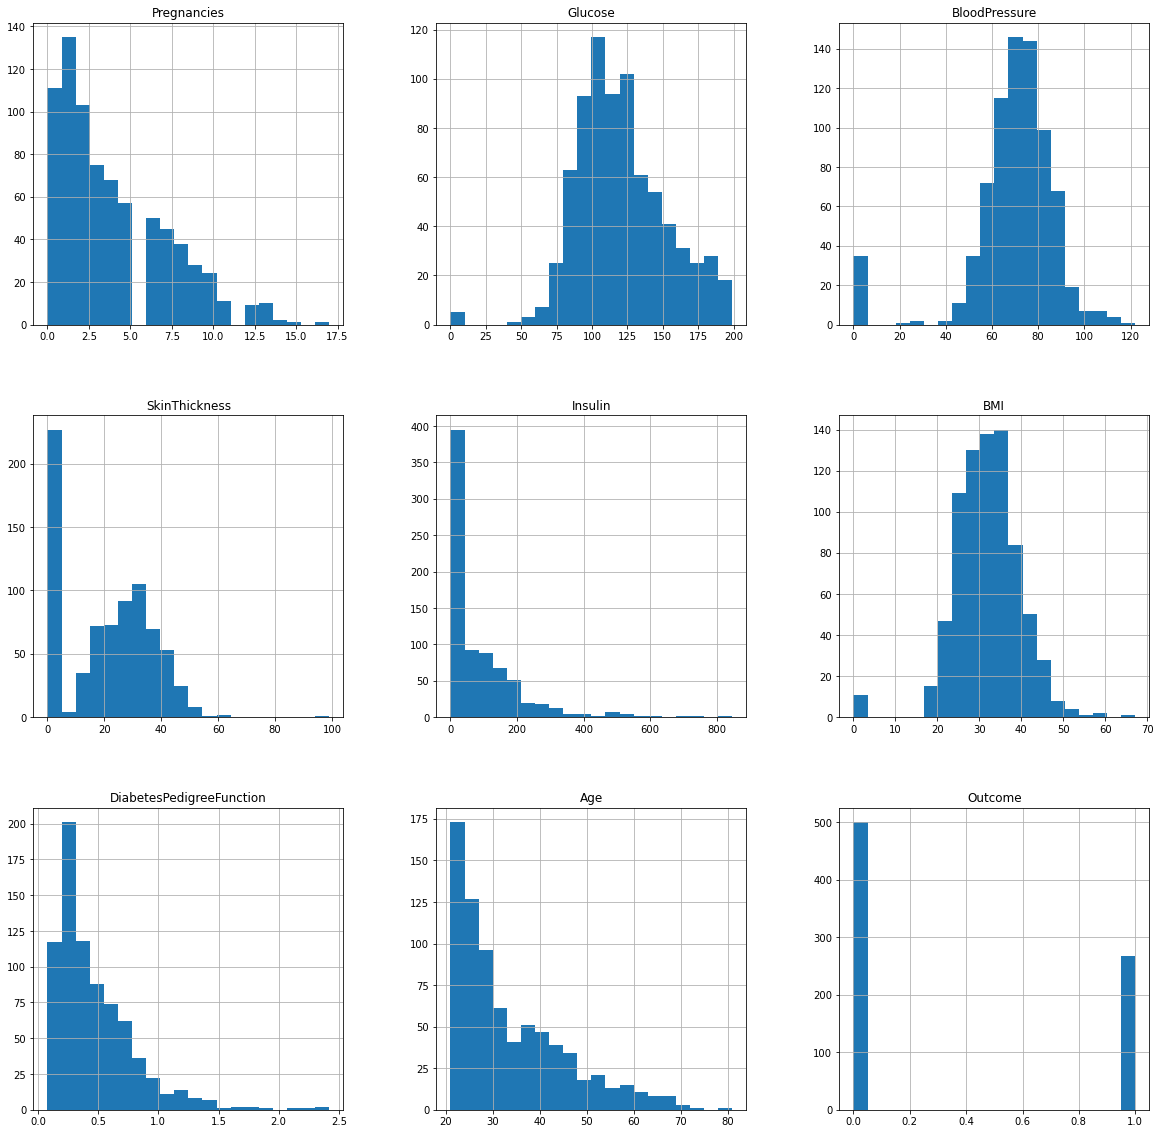

In [8]:
#Checking the Distribution of our various columns

p = df.hist(bins=20,figsize = (20,20))

### Cleaning our Dataset for EDA

From the histograms abve which portray how the values in the columns are distributed, we discover some abnormalies. There are certain columns that contain some null values which do not make medical sense such as:
- Glucose column
- BloodPressure
- SkinThickness
- Insulin
- BMI

In order to get better better results for our Analysis we will replace the '0' values in these columns with NAN and in then replace with the median value of the values in the respective columns.


In [9]:
#creating a new dataframe to continue our EDA

df_EDA = df.copy(deep = True)
df_EDA[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_EDA[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_EDA.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
#replace nan with  median for the purpose of EDA

df_EDA['Glucose'].fillna(df_EDA['Glucose'].median(), inplace = True)
df_EDA['BloodPressure'].fillna(df_EDA['BloodPressure'].median(), inplace = True)
df_EDA['SkinThickness'].fillna(df_EDA['SkinThickness'].median(), inplace = True)
df_EDA['Insulin'].fillna(df_EDA['Insulin'].median(), inplace = True)
df_EDA['BMI'].fillna(df_EDA['BMI'].median(), inplace = True)

### EDA Proper

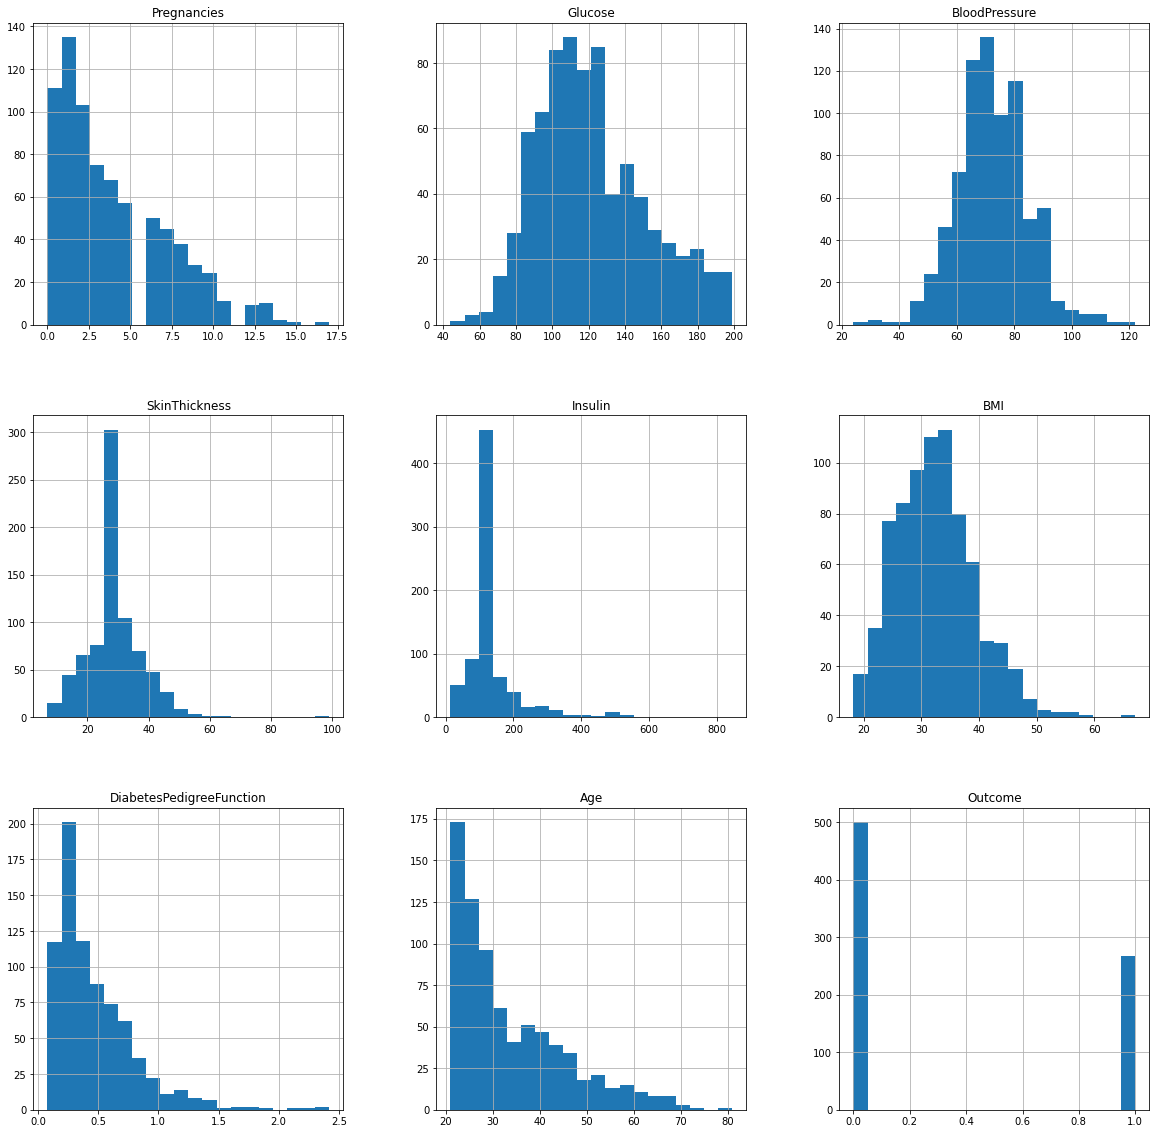

In [11]:
#plotting new distribution after the '0' has been replaced

p = df_EDA.hist(bins=20,figsize = (20,20))

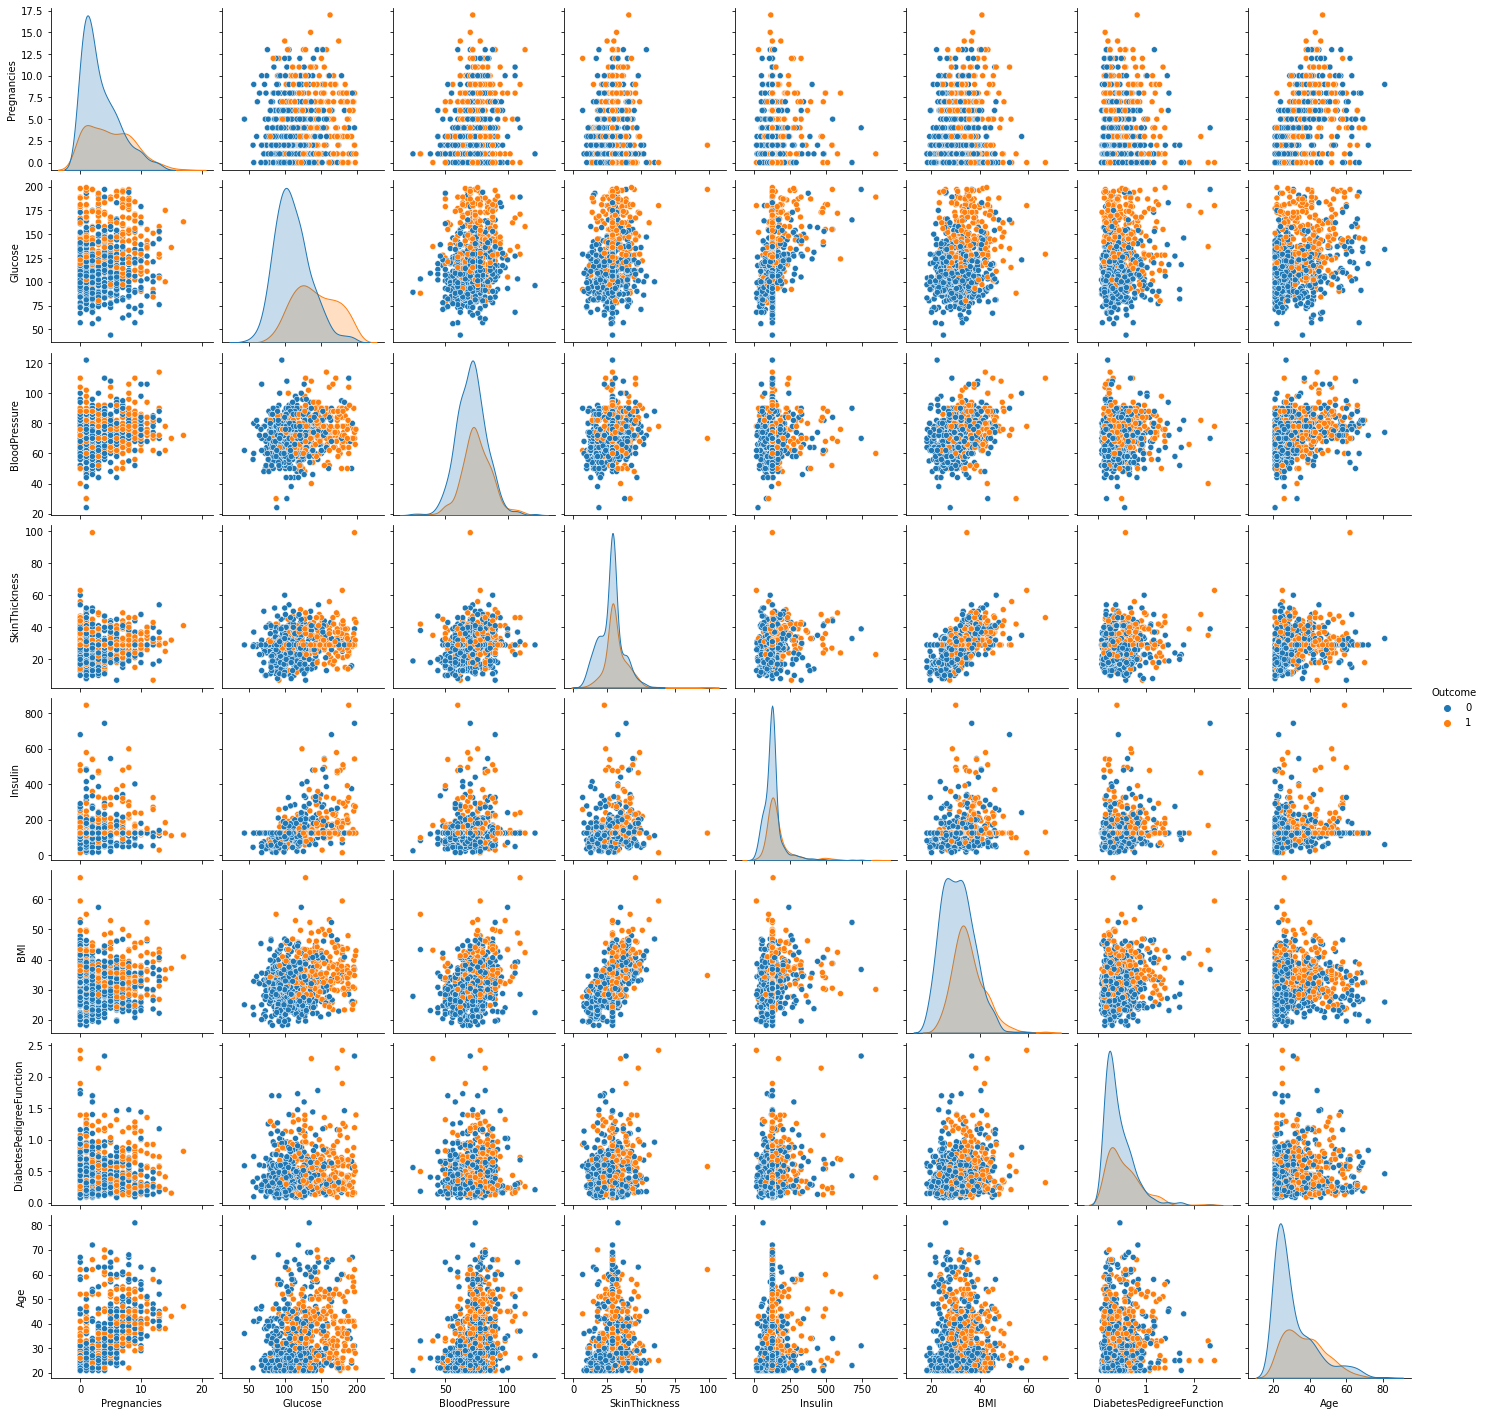

In [12]:
#Finding the relationship between the various columns and how it affects the individuals rate of having diabetes or not.

p=sns.pairplot(df_EDA, hue = 'Outcome')

**Pairplot Findings**

From the above pairplot we can notice a linear relationship between BMI and Skin Thickness. The thicker an indivual is,the higher her BMI and this also leads to a higher chance of the individual having Diabetes.

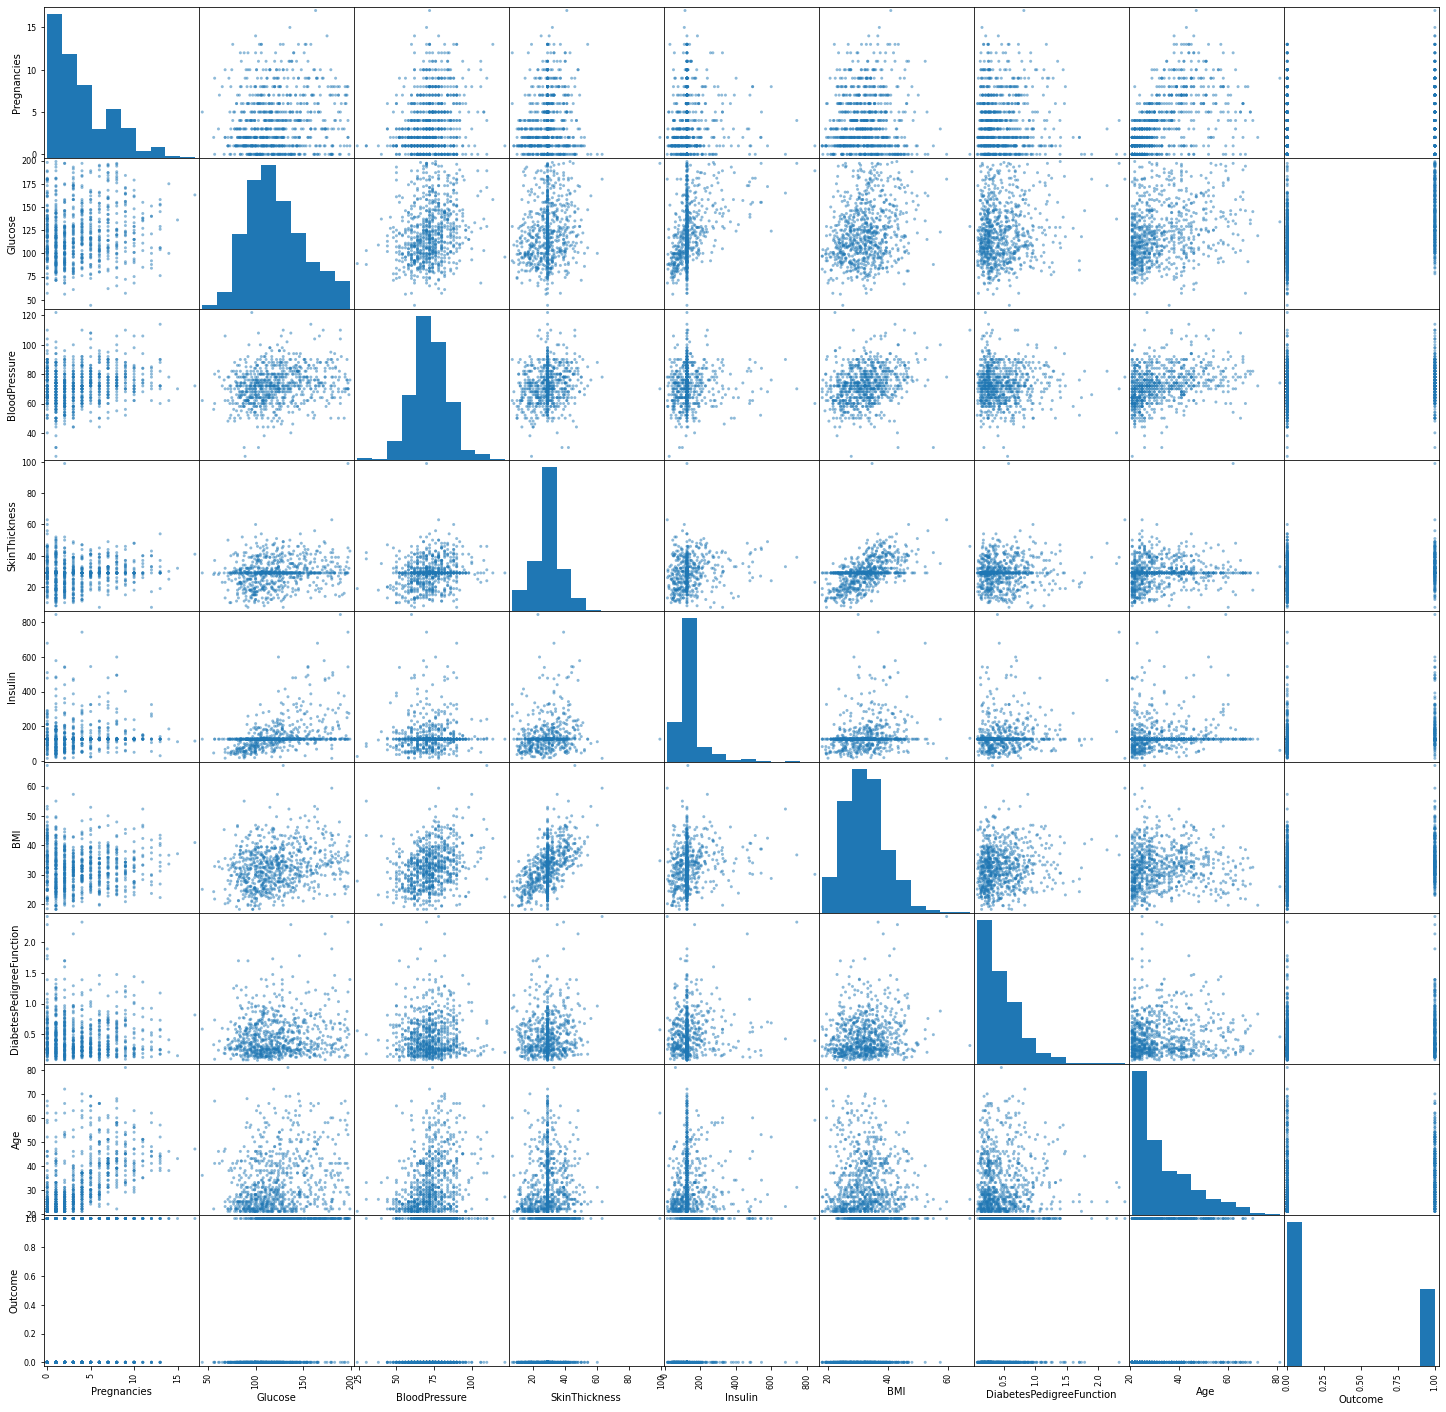

In [13]:
#Plotting a scatter matrix to gather more info between the columns

from pandas.plotting import scatter_matrix
p=scatter_matrix(df_EDA,figsize=(25, 25))

**Findings from scatter plot**

As earlier discovered we see a clear relationship between Skin Thickness and BMI . Also we notice that there might exist a slight relationship between Glucose and Insulin. 

However before concluding we will draw a correlation matrix to get the exact correlation between these columns.

<AxesSubplot:>

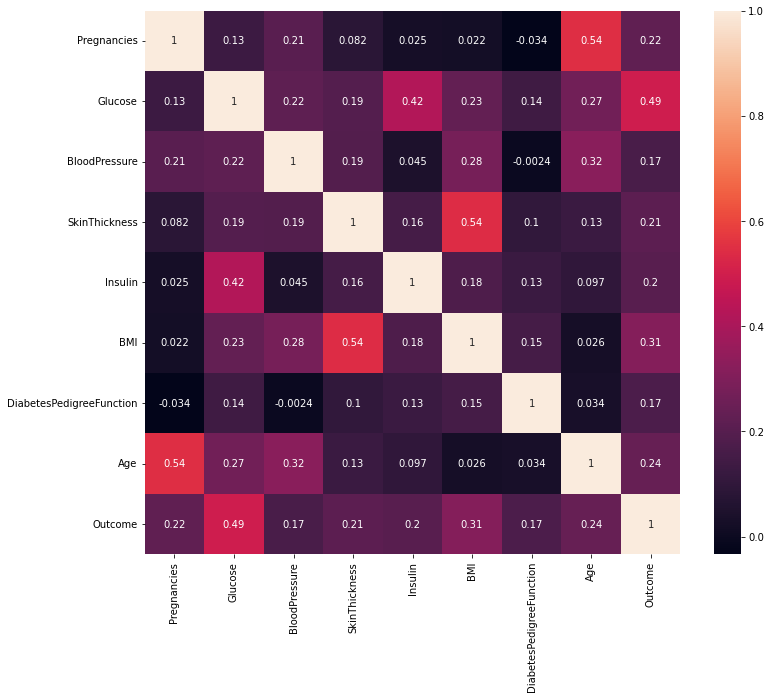

In [14]:
# Correlationn Matrix

plt.figure(figsize = (12,10))

sns.heatmap(df_EDA.corr(), annot =True)

**Findings from correlation matrix**

From the above correlation matrix Glucose has the highest correlation with our label column 'Outcome' at 0.49. Let us use a violin plot to see this.

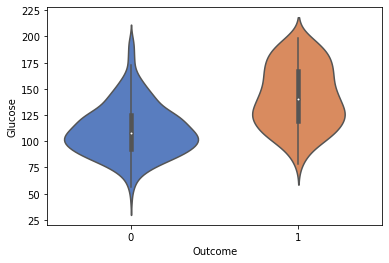

In [15]:
#Classifying the Glucose based on class
ax = sns.violinplot(x='Outcome', y='Glucose', data=df_EDA, palette='muted', split=True)

**Findings from Violin Plot**

Observing the violin plot, we see a massive vertical distance between the box-plot for Diabetics and Non-Diabetics. This indicates that Glucose can be a very important variable in model-building.

### Conclusion on our EDA and setting our Hypothesis

From our Explorative Data Analysis,we can set the following Hypothesis:

- Diabetics seem to have a higher blood pressure than the non-diabetics 
- BMI for diabetics is more than BMI for non-diabetics
- Diabetics seem to have a higher pedigree function that the non-diabetics
- Diabetics seem to have a higher level of Glucose than non-diabetics
- It can be roughly hypothesized that Insulin for Diabetics is lower than Non-Diabetics.
- It can be observed that diabetic women had more pregnancies than non-diabetic
- Skin Thickness for Diabetics is more than that of Non-Diabetics
- The older a woman gets,the more chances she has of becoming Daibetic.

**In conclusion:**

To conclude we will not be deleting any of our features as we can see that they all have somewhat a correlation with our label column 'Outcome'

## Preprocessing for Machine Learning Algorithms

### Split into Test and Train Sets

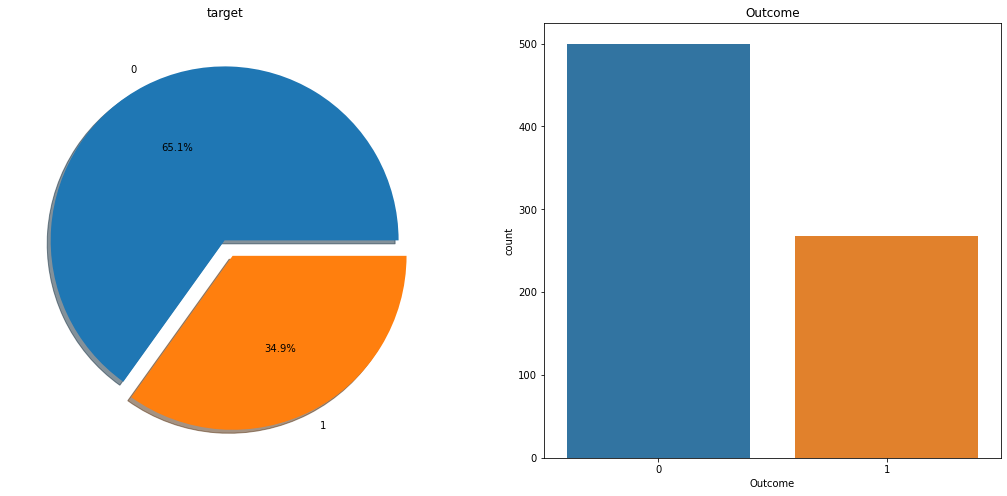

In [16]:
# Die Verteilung der Ergebnisvariablen in den Daten wird untersucht und visualisiert.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()



**Findings**

We can see that one class has a lot more weight than the other class. It is important that,when splitting our data into the training and testing set,we must startify. This is to make sure that the distribution between both classes in both sets are the same.

In [17]:
#create a new dataframe that replaces the columns with '0' values with Nan in the columns below:

df_NAN = df.copy(deep = True)
df_NAN[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_NAN[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_NAN.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [18]:
#convert pandas dataframe to numpy array 


df_ML=df_NAN.to_numpy()

#split into features and target
x = df_ML[:, 0:7]
y = df_ML[:, 8]

In [19]:


#We must stratify while splitting into test and train
#We will stratify using our label/target column (y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45, stratify=y)

### Imputing (replace the nan value with simple imputer :Mean)

In [20]:
x_train

array([[0.00e+00, 1.52e+02, 8.20e+01, ..., 2.72e+02, 4.15e+01, 2.70e-01],
       [3.00e+00, 1.74e+02, 5.80e+01, ..., 1.94e+02, 3.29e+01, 5.93e-01],
       [5.00e+00, 9.50e+01, 7.20e+01, ...,      nan, 3.77e+01, 3.70e-01],
       ...,
       [4.00e+00, 1.20e+02, 6.80e+01, ...,      nan, 2.96e+01, 7.09e-01],
       [3.00e+00, 1.02e+02, 4.40e+01, ..., 9.40e+01, 3.08e+01, 4.00e-01],
       [0.00e+00, 1.05e+02, 6.80e+01, ...,      nan, 2.00e+01, 2.36e-01]])

In [21]:
np.isnan(x_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

In [22]:
#Start with x_train

from sklearn.impute import SimpleImputer
imputer_1=SimpleImputer(missing_values=np.NaN,strategy="mean")


imputer_1.fit(x_train)



SimpleImputer()

In [23]:
x_train=imputer_1.transform(x_train)

In [24]:
#proofing if we still have nan values
np.isnan(x_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [25]:
print(np.nan in x_train)

False


In [26]:
#Now on x_test

imputer_1.fit(x_test)


SimpleImputer()

In [27]:
x_test=imputer_1.transform(x_test)

In [28]:
print(np.nan in x_test)

False


### Scaling 

In [29]:
#scaling x_train

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(x_train)
x_train=ss.transform(x_train)


In [30]:
#scaling x_test

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(x_test)
x_test=ss.transform(x_test)


## Testing Our Machine Learning Algorithms

In order to find a good model to predict if a patient will have diabetes or not, our expected score should be 0.9. Because the nature of this dataset is of a classification type we will be using the following classification models:
- Niaves Bayes
- Random Forest
- KNN
- Decision Trees 
- SVM
- Logistic Regression


### Naives Bayes Algorithm

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

The reason why we have chosen to test this model is for the following reasons:
- Naïve Bayes is one of the fastest and easy ML algorithms to predict a class of datasets.
- It is the most popular choice for text classification problems
- It is suitable for use in medical data classification 


In [31]:
#Using the GaussianNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [32]:
#predict

y_pred=gnb.predict(x_test)


In [33]:
#Check for accuracy score on both test and train to check for overfitting

from sklearn.metrics import accuracy_score

print('Training set score: {0:0.4f}'. format(gnb.score(x_train,y_train)))
print('Testing set score: {0:0.4f}'. format(gnb.score(x_test,y_test)))

Training set score: 0.7573
Testing set score: 0.7857


#### Result 1

From our above results,it may seem that there is no overfitting as there is no big difference between our train and test accuracy scores.

To better understand the scores divided into the seperate classes, we will do some more investigations below.

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       100
         1.0       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[88 12]
 [21 33]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.21428571428571427
R2 score is:
 0.05888888888888866


#### Result 2

This implies, our model predicted classified correctly 79% of the times.

The Precision score (macro avg) stood at 0.77, implying our model correctly classified observations with high risk of Diabetes in the high risk category 77% of the times. The Recall stood at 0.73.

We also have an F1 score of 0.75. The F1 score is the harmonic mean of precision and recall. It assigns equal weight to both the metrics. However, for our analysis it is relatively more important for the model to have low false negative cases (as it will be dangerous to classify high risk patients in low risk category). Therefore, we individually look at Precision and Recall.

#### Improving Our Model

**Using Cross Validation**

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80645161 0.77419355 0.82258065 0.70967742 0.6557377  0.63934426
 0.75409836 0.7704918  0.80327869 0.78688525]


In [36]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7523


#### Result 3

After performing cross Validation on our model, we see no improvement,so we move to parameter tuning with gridsearch.

**Using Parameter Tuning with Grid search**

In [37]:


from sklearn.model_selection import GridSearchCV



# declare parameters for hyperparameter tuning
parameters = [ {
    'var_smoothing': np.logspace(0,-9, num=100)
}
              ]




grid_search = GridSearchCV(estimator = gnb,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5
                           )


grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid=[{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}],
             scoring='accuracy')

In [38]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7590


Parameters that give the best results : 

 {'var_smoothing': 0.23101297000831597}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=0.23101297000831597)


#### Result 4

The gridsearch did not offer any better results.

#### CONCLUSION ON NAIVE BAYES

- From our model we can conclude that  we expect the model to be around 79% accurate 
- Our original model accuracy is 0.78, but the mean cross-validation accuracy is 0.75. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

### Support Vector Machines (SVM)

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

#### Decision Funktion: OVR

In [39]:
from sklearn.svm import SVC 


svc_ovr = SVC(decision_function_shape='ovr', kernel='rbf', C=1) #ovr = one versus rest 
svc_fit=svc_ovr.fit(x_train, y_train) #fit on training data
pred_ovr= svc_fit.predict(x_test) #predict on X_test
score_ovr_train = round(svc_fit.score(x_train, y_train),3) #predict score on X_train, Y_train
score_ovr_test = round(svc_fit.score(x_test, y_test),3) #predict score on X_test, Y_test
print(f'Score SVM (one versus rest) on training set: {score_ovr_train}')
print()
print(f'Score SVM (one versus rest) on test set: {score_ovr_test}')
print()
print(f'real Data: {y_test}') 
print()
print(f'predicted Data: {pred_ovr}')

Score SVM (one versus rest) on training set: 0.819

Score SVM (one versus rest) on test set: 0.734

real Data: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]

predicted Data: [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

#### Decision Funktion : OVO

In [40]:
svc_ovo = SVC(decision_function_shape='ovo', kernel='sigmoid') 
svc_fit=svc_ovo.fit(x_train, y_train) 
pred_ovo= svc_fit.predict(x_test) 
score_ovo_train = round(svc_fit.score(x_train, y_train),3) 
score_ovo_test = round(svc_fit.score(x_test, y_test),3)
print(f'Score SVM (one versus one) on training set : {score_ovo_train}')
print()
print(f'Score SVM (one versus one) on test set: {score_ovo_test}')
print()
print(f'Real label: {y_test}') 
print()
print(f'Predicted label: {pred_ovo}') 

Score SVM (one versus one) on training set : 0.697

Score SVM (one versus one) on test set: 0.714

Real label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]

Predicted label: [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

#### Iteration on Training set-Features
Features will be dropped one after another and new scores realised


In [41]:
colums = [0,1,2,3,4,5,6]

for i in colums:
    x_del = np.delete(x_train, i, 1)
    #print(f'shape for data without column {i}: {data_concat_del.shape[1]}')

    #apply Support Vector Machines with one versus rest:
    svc_ovr = SVC(decision_function_shape='ovr') #ovr = one versus rest 
    svc_fit1 = svc_ovr.fit(x_del, y_train)
    pred_ovr = svc_fit1.predict(x_del)
    score_ovr_train = round(svc_fit1.score(x_del, y_train),3)
    print(f'Score SVM (one versus rest) on training set without feature{i}: {score_ovr_train}')
    # Score: 0.8125 with SimpleImputer(strategy = 'mean')
    # Score: 0.814 with SimpleImputer(strategy = 'median')
    #print(f'target:\n {y_train}')
    #print(f'predicted SVM OVR:\n {pred_ovr}')

    #apply Support Vector Machines with one versus one:
    svc_ovo = SVC(decision_function_shape='ovo') #ovr = one versus one 
    svc_fit2 = svc_ovo.fit(x_del, y_train)
    pred_ovo = svc_fit2.predict(x_del)
    score_ovo_train = round(svc_fit2.score(x_del, y_train),3)
    print(f'Score SVM (one versus one) on training set without feauture{i}: {score_ovo_train}')
    # Score: 0.814 with SimpleImputer(strategy = 'mean')
    # Score: 0.814 with SimpleImputer(strategy = 'median')
    #print(f'target:\n {y_train}')
    #print(f'predicted SVM OVO:\n {pred_ovo}')
    #Fazit: Score bleibt gleich zwischen ovr und ovo

    print()
print("Conclusion: Score between OVR and OVO remains the same")

Score SVM (one versus rest) on training set without feature0: 0.808
Score SVM (one versus one) on training set without feauture0: 0.808

Score SVM (one versus rest) on training set without feature1: 0.752
Score SVM (one versus one) on training set without feauture1: 0.752

Score SVM (one versus rest) on training set without feature2: 0.818
Score SVM (one versus one) on training set without feauture2: 0.818

Score SVM (one versus rest) on training set without feature3: 0.811
Score SVM (one versus one) on training set without feauture3: 0.811

Score SVM (one versus rest) on training set without feature4: 0.808
Score SVM (one versus one) on training set without feauture4: 0.808

Score SVM (one versus rest) on training set without feature5: 0.801
Score SVM (one versus one) on training set without feauture5: 0.801

Score SVM (one versus rest) on training set without feature6: 0.79
Score SVM (one versus one) on training set without feauture6: 0.79

Conclusion: Score between OVR and OVO remai

-  The score does not chnage between OVR and OVO. 
- The score is highest when  kernel = "rbf".
- No difference is noticed if teh simple imputer si changed from mean to median.
- In general the score gets better when some particular feautures are dropped.

#### Iteration on Test-Features
Features will be dropped one after another and new scores realised

In [42]:
colums = [0,1,2,3,4,5,6]

for i in colums:
    x_del = np.delete(x_test, i, 1)
    #print(f'shape for data without column {i}: {data_concat_del.shape[1]}')

    #apply Support Vector Machines with one versus rest:
    svc_ovr = SVC(decision_function_shape='ovr') #ovr = one versus rest 
    svc_fit1 = svc_ovr.fit(x_del, y_test)
    pred_ovr = svc_fit1.predict(x_del)
    score_ovr_test = round(svc_fit1.score(x_del, y_test),3)
    print(f'Score SVM (one versus rest) on test set without feature {i}: {score_ovr_test}')
    # Score: 0.8125 with SimpleImputer(strategy = 'mean')
    # Score: 0.814 with SimpleImputer(strategy = 'median')
    #print(f'target:\n {y_train}')
    #print(f'predicted SVM OVR:\n {pred_ovr}')

    #apply Support Vector Machines with one versus one:
    svc_ovo = SVC(decision_function_shape='ovo') #ovr = one versus one 
    svc_fit2 = svc_ovo.fit(x_del, y_test)
    pred_ovo = svc_fit2.predict(x_del)
    score_ovo_test = round(svc_fit2.score(x_del, y_test),3)
    print(f'Score SVM (one versus one) on test set without feauture {i}: {score_ovo_test}')
    # Score: 0.814 with SimpleImputer(strategy = 'mean')
    # Score: 0.814 with SimpleImputer(strategy = 'median')
    #print(f'target:\n {y_train}')
    #print(f'predicted SVM OVO:\n {pred_ovo}')
    #Fazit: Score bleibt gleich zwischen ovr und ovo

    print()
print("Conclusion: Score between OVR and OVO reamins same")

Score SVM (one versus rest) on test set without feature 0: 0.844
Score SVM (one versus one) on test set without feauture 0: 0.844

Score SVM (one versus rest) on test set without feature 1: 0.812
Score SVM (one versus one) on test set without feauture 1: 0.812

Score SVM (one versus rest) on test set without feature 2: 0.844
Score SVM (one versus one) on test set without feauture 2: 0.844

Score SVM (one versus rest) on test set without feature 3: 0.838
Score SVM (one versus one) on test set without feauture 3: 0.838

Score SVM (one versus rest) on test set without feature 4: 0.825
Score SVM (one versus one) on test set without feauture 4: 0.825

Score SVM (one versus rest) on test set without feature 5: 0.844
Score SVM (one versus one) on test set without feauture 5: 0.844

Score SVM (one versus rest) on test set without feature 6: 0.844
Score SVM (one versus one) on test set without feauture 6: 0.844

Conclusion: Score between OVR and OVO reamins same


-  The score does not chnage between OVR and OVO. 
- The score is highest when  kernel = "rbf".
- No difference is noticed if teh simple imputer si changed from mean to median.
- In general the score gets better when some particular feautures are dropped.
 - The test score is better than the training score.

#### Validation Curve SVM

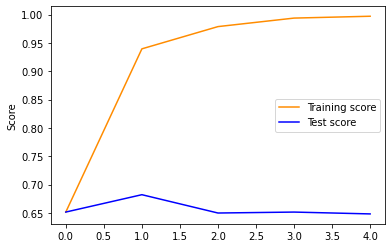

In [43]:
from sklearn.model_selection import validation_curve

param_range = range(0, 5, 1)

train_scores, test_scores = validation_curve(SVC(), x_train, y_train, param_name = "gamma", scoring="accuracy", param_range=param_range, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Test score", color="blue")
plt.ylabel("Score")

plt.legend(loc='best')
plt.show()

#### Cross Validation SVM

In [44]:
from sklearn.model_selection import cross_val_score
#assuming that SVC is already imported from sklearn

svc=SVC()

scores = cross_val_score(svc, x_train, y_train, cv = 300, scoring='accuracy')

avg_score = round(scores.mean(),2)

print('Cross-validation scores:')
print(scores)
print()

print('Average cross-validation score:')
print(avg_score)

Cross-validation scores:
[0.66666667 1.         1.         0.66666667 1.         1.
 0.66666667 1.         0.66666667 0.66666667 1.         0.66666667
 0.66666667 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.5        1.         1.
 1.         1.         0.5        1.         1.         1.
 0.         1.         0.5        1.         1.         1.
 1.         1.         1.         1.         0.5        1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.5        0.5        1.         1.         1.
 1.         0.5        1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.5
 1.         0.5        1.         1.         0.5        0.5
 1.         0.5        1.         0.5        1.         1.
 1.         1.         1.         0.5        0.5        1.
 1.         0.5      

#### Grid Search SVM


In [ ]:
from sklearn.model_selection import GridSearchCV

svc=SVC() #assuming SVC has been imported

# Parameter fürs Hyperparameter-Tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
]


grid_search_svm = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 10, verbose=0)
grid_search_svm.fit(x_train, y_train)

grid_search_svm_test = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 10, verbose=0)
grid_search_svm_test.fit(x_test, y_test)

print('Highest Gridsearch-CV score on training set:')
bestscoretrain=grid_search_svm.best_score_
print(round(bestscoretrain, 3))
print()

print('Highest Gridsearch-CV score on test set:')
bestscoretest=grid_search_svm_test.best_score_
print(round(bestscoretest, 3))
print()

print('Parameter for train that gives the best result:')
print(grid_search_svm.best_params_)
print()

print('Parameter for test that gives the best result:')
print(grid_search_svm_test.best_params_)
print()

print('Estimator for train chosen by the gridesearch -CV:')
print(grid_search_svm.best_estimator_)
print()

print('Estimator for test chosen by the gridesearch -CV:')
print(grid_search_svm_test.best_estimator_)
print()


### Decision Trees 

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

We will be testing this model for the following reasons:
- Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
- The logic behind the decision tree can be easily understood because it shows a tree-like structure.
- It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
- It can be very useful for solving decision-related problems.
- It helps to think about all the possible outcomes for a problem.
- There is less requirement of data cleaning compared to other algorithms.

In [ ]:
from sklearn import tree

dctree = tree.DecisionTreeClassifier(random_state=4, criterion='entropy')
dctree_fit = dctree.fit(x_train, y_train)
pred_dctree_train = dctree.predict(x_train)
pred_dctree_test = dctree.predict(x_test)
score_dctree_train = round(dctree.score(x_train,y_train),3)
score_dctree_test = round(dctree.score(x_test,y_test),3)
print(f'Decision Tree Score on Trainingset: {score_dctree_train}')
print()
print(f'Decision Tree Score on Test set: {score_dctree_test}')
print()
print(f'Training label real:')
print(y_train)
print()
print(f'Training label predicted:')
print(pred_dctree_train)
print()
print(f'Testslabel real:')
print(y_train)
print()
print(f'Testdaten predicted:')
print(pred_dctree_test)
print()

**Result 1**

We see a case of overfitting here as the training score and test score are largely different.

#### Cross Validation Decision Trees

In [ ]:
from sklearn.model_selection import cross_val_score
#assuming here that tree has been imported from sklearn

dtree=tree.DecisionTreeClassifier(random_state=4, criterion='entropy', min_samples_split=3) #same parameters as above

scores = cross_val_score(svc, x_train, y_train, cv = 300, scoring='accuracy')

avg_score = round(scores.mean(),2)

print('Cross-validation scores:')
print(scores)
print()

print('Average cross-validation score:')
print(avg_score)

#### Grid search Decision Trees


In [ ]:
from sklearn.model_selection import GridSearchCV

dtree=tree.DecisionTreeClassifier()
dtree.get_params().keys()


parameters = [{'criterion' : ['gini','entropy','log_loss'], 'min_samples_split' : [2,3,4]}
             ]


grid_search_svm = GridSearchCV(estimator = dtree, param_grid = parameters, scoring = 'accuracy', cv = 10, verbose=0)
grid_search_svm.fit(x_train, y_train)

grid_search_svm_test = GridSearchCV(estimator = dtree, param_grid = parameters, scoring = 'accuracy', cv = 10, verbose=0)
grid_search_svm_test.fit(x_test, y_test)

print('Highest Gridsearch-CV score on training set::')
bestscoretrain=grid_search_svm.best_score_
print(round(bestscoretrain, 3))
print()

print('Highest Gridsearch-CV score on test set::')
bestscoretest=grid_search_svm_test.best_score_
print(round(bestscoretest, 3))
print()

print('Parameter for train that gives the best result:')
print(grid_search_svm.best_params_)
print()

print('Parameter for test that gives the best result:')
print(grid_search_svm_test.best_params_)
print()

print('Estimator for train chosen by the gridesearch -CV:')
print(grid_search_svm.best_estimator_)
print()

print('Estimator for test chosen by the gridesearch -CV:')
print(grid_search_svm_test.best_estimator_)
print()

### Logistic Regression

Wir verwenden den SGD-Klassifikator von Scikit-learn, um eine logistische Regression durchzuführen.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html. Dies ist sinnvoll, da in der Zielspalte Outcome ein kategorischer Wert steht (0 oder 1).

loss='log' steht für logistische Regression
alpha ist der Regularisierungsterm. Je höher der Wert, desto stärker ist die Regularisierung
eta0 ist die anfängliche Lernrate für die 'constant', 'invscaling' oder 'adaptive' learning_rate
max_iter ist die maximale Anzahl von Durchläufen über die Trainingsdaten (auch Epochen genannt)



Wir definieren das Modell:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train , y_train)


In [ ]:
print("logistic Regression Coef ", log_reg.coef_)
print("logistic Regression Intercept ", log_reg.intercept_)
print("Score on Training set " ,log_reg.score(x_train, y_train))
print("Score on Test set" ,log_reg.score(x_test, y_test))

#### Result 1

- Our train score is 0.76
- Our Test score is 0.79

#### Improving Our Model


**Using Cross Validation**

In [ ]:
# Crossvalscore on Train set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores on Train set:{}'.format(scores))
print('Average cross-validation score on Train set: {:.4f}'.format(scores.mean()))

**Result 2**

We see no improvement in our scores after cross validation has been done .


**Using Gridsearch**

In [ ]:
# Grid search cross validation on Training set
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) on Training set ",logreg_cv.best_params_)
print("accuracy on Training set :",logreg_cv.best_score_)

In [ ]:
 #Grid search cross validation on test set
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_test,y_test)

print("tuned hpyerparameters on test set :(best parameters) ",logreg_cv.best_params_)
print("accuracy on test set:",logreg_cv.best_score_)


#### Results and Conclusion from Logistic Regression

There are no improvements on the model after the parameters have been tuned

### Ensemble Method: Random Forest Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

This model was chosen for the following reasons:
- 	It takes less training time as compared to other algorithms.
-	It predicts output with high accuracy, even for the large dataset it runs efficiently.
-	It can also maintain accuracy when a large proportion of data is missing.
-   The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
-   With the help of this algorithm, disease trends and risks of the disease can be identified. In other words this model is widely used in teh Health sector.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

In [ ]:
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

#### Result 1

From our above results,it may seem that there is a presence of overfitting as 
- there is a big difference between our train and test accuracy scores.
- The Train set score is 100%

Before we confirm the scores and deal with the issue of overfitting,we will do some more investigations below.

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

#### Result 2
This implies, our model predicted classified correctly 76% of the times on our test set.

The Precision score (macro avg) stood at 0.74, implying our model correctly classified observations with high risk of Daibetes in the high risk category 74% of the times. The Recall stood at 0.72.

We also have an F1 score of 0.72. The F1 score is the harmonic mean of precision and recall. It assigns equal weight to both the metrics. However, for our analysis it is relatively more important for the model to have low false negative cases (as it will be dangerous to classify high risk patients in low risk category). Therefore, we individually look at Precision and Recall.


#### Improving our model

**Using Cross Validation**

In [ ]:
scores = cross_val_score(model, x_train, y_train, cv = 20, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

#### Result 3

After performing cross Validation on our model, we see no improvement,so we move to parameter tuning with gridsearch.

**With Gridsearch**

In [ ]:
#First Gridsearch

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# declare parameters for hyperparameter tuning
parameters = [ {'n_estimators':[100, 200, 300, 400], 'criterion':['gini']},
               {'n_estimators':[100, 200, 300, 400], 'criterion':['entropy'], 'max_features':['sqrt']},
               {'n_estimators':[100, 200, 300, 400], 'criterion':['log_loss'], 'max_features': ['log2']} 
              ]




grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3 
                           )


grid_search.fit(x_train, y_train)




In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
#Second Grid Search

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# declare parameters for hyperparameter tuning
parameters = [ {'n_estimators':[100, 200, 300, 400], 'criterion':['gini'],'max_features':['log2'],
                },
               {'n_estimators':[100, 200, 300, 400], 'criterion':['entropy'], 'max_features':['sqrt'],
                'max_depth':[3,5],'min_samples_split':[2,3],'random_state':[50]},
               {'n_estimators':[100, 200, 300, 400], 'criterion':['log_loss'], 'max_features': ['log2']} 
              ]




grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3 
                           )


grid_search.fit(x_train, y_train)


In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

#### Result 4

Since the second grid search gives a better result, let us try using these parameters on our model.

In [ ]:
gs=pd.DataFrame(grid_search.cv_results_)
gs.head()

In [ ]:
#Testing with teh new parameters

model = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       random_state=50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

In [ ]:
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

#### Result 5

After our gridsearch we get a new result on our training set of 83.5 % which is lower than 100% but which shows a better sign of no overfitting. The score training sets goes a little bit higher to 76%.

#### Checking for Feauture Importance with Random Forest Classifier

In [ ]:
model.feature_importances_

In [ ]:
columns_u=df_NAN.iloc[:,0:7].columns
plt.barh(columns_u, model.feature_importances_)

#### Result 6

The figure above shows the relative importance of features and their contribution to the model. Since it was a small dataset with less columns, I didn’t use Feature Selection technique such as PCA.

However we will try to remove the least important column:Blood Pressure and or Skin Thickness and see if itz makes any difference with the results from our grid search best parameters.

In [ ]:
#Define our new x_train 

x_train_new=a_del =np.delete(x_train,[2],1)
x_test_new=a_del = np.delete(x_test,[2],1)


In [ ]:
x_train_new.shape

In [ ]:
x_train.shape

In [ ]:
model_new = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       random_state=50)
model_new.fit(x_train_new, y_train)
y_pred = model_new.predict(x_test_new)

In [ ]:
model_new.score(x_train_new,y_train)

In [ ]:
print('Accuracy of Random Forest on test set: {:.2f}'.format(model_new.score(x_test_new, y_test)))

#### Result 7

When we remove the least important columns the scores only increase by a small factor. 

### Conclusion

**War unsere Hypothese richtig?**

Based on our feature importance:

Glucose is the most important factor in determining the occurrence of diabetes, followed by BMI and age. Other factors such as diabetes pedigree function, pregnancies, blood pressure, skin thickness and insulin also contribute to the prediction. As we can see, the results of feature importance make sense because one of the first things that is actually monitored in high-risk patients is glucose levels.


The risk also increases as the person gets older.

**Can the result be trusted? **

Based on a maximum training score of 90%, which we were able to find for this data set from our research, we can trust our results with training scores from 80%. In the case of a 100% training score at RandomForest and NeuralNetworks, it is obviously overfitting. Here the corresponding test scores are very low. We wouldn't trust these scores. 

**To Conclude**
Therefore, we can choose the Random Forest Classifier or SVM as the right model due to the high accuracy, precision and recall score. One reason Random Forest Classifier showed improved performance was the presence of outliers. As mentioned earlier, since Random Forest is not a distance-based algorithm, it is not heavily influenced by outliers, while distance-based algorithms such as Logistic Regression  showed lower performance.

